# Frequency-Selective Channel Demonstration

This notebook demonstrates how a frequency-selective channel affects transmitted signals, such as QPSK.

## 1. Impulse Response and Frequency Response of the Channel

[0. 0. 0.]


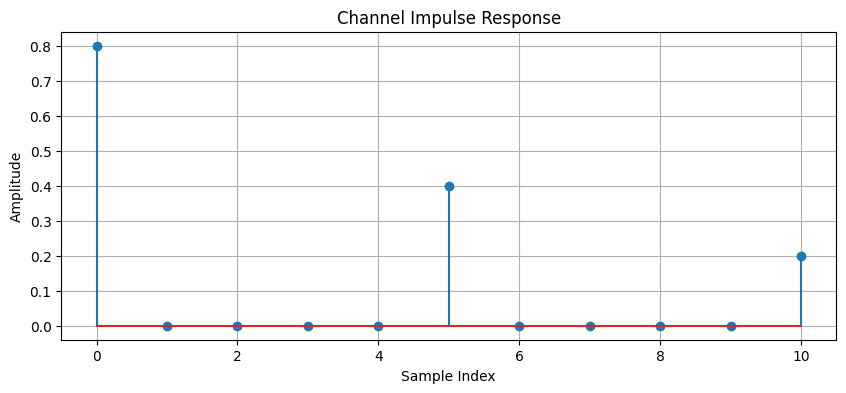

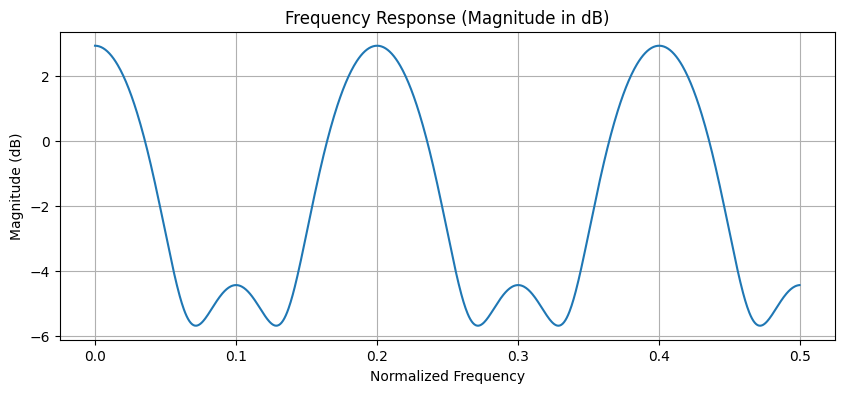

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz

# Simulate a frequency-selective channel
channel_taps = np.array([0.8, 0.4, 0.2])
delay = 5
channel_impulse_response = np.zeros(delay * (len(channel_taps) - 1) + 1)
print(channel_impulse_response[::delay])
channel_impulse_response[::delay] = channel_taps

# Plot impulse response
plt.figure(figsize=(10, 4))
plt.stem(channel_impulse_response)
plt.title("Channel Impulse Response")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Plot frequency response
w, h = freqz(channel_impulse_response, worN=1024, fs=1.0)
plt.figure(figsize=(10, 4))
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title("Frequency Response (Magnitude in dB)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()


## 2. QPSK Signal and Effect of Channel

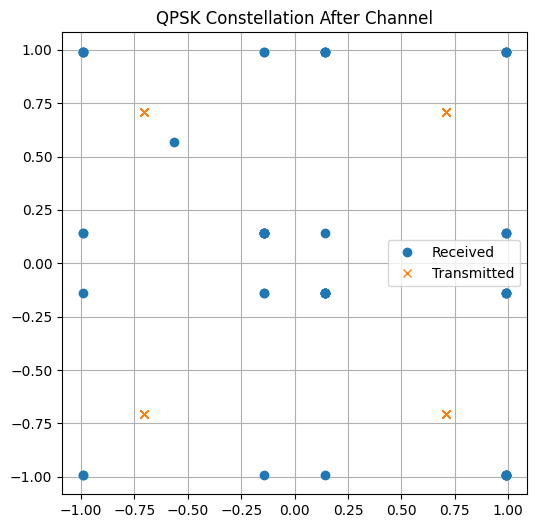

In [2]:

# Generate QPSK symbols
np.random.seed(0)
bits = np.random.randint(0, 2, 100)
symbols = (2 * bits[0::2] - 1) + 1j * (2 * bits[1::2] - 1)
symbols /= np.sqrt(2)  # normalize power

# Apply the channel
tx_signal = np.repeat(symbols, 10)  # oversample
rx_signal = lfilter(channel_impulse_response, [1.0], tx_signal)

# Downsample for plotting
rx_symbols = rx_signal[::10][:len(symbols)]

# Plot received constellation
plt.figure(figsize=(6, 6))
plt.plot(np.real(rx_symbols), np.imag(rx_symbols), 'o', label="Received")
plt.plot(np.real(symbols), np.imag(symbols), 'x', label="Transmitted")
plt.grid(True)
plt.axis("equal")
plt.title("QPSK Constellation After Channel")
plt.legend()
plt.show()


## 3. Summary
- A frequency-selective channel introduces multipath components.
- This creates a non-flat frequency response that distorts signals.
- In the time domain, it spreads out the symbols, causing ISI.
- In the frequency domain, it attenuates different components unequally.
- Equalization or OFDM is typically used to mitigate these effects.